# PALM病理性近视病灶检测与分割


    
    
**数据基本标签**

	萎缩病变分割金标准：萎缩区域：0；背景：255；
	脱离病变分割金标准：脱离区域：0；背景：255。
    
**训练数据集**
文件名称：Train

Train里有两个文件夹，一个是fundus_images，一个是Lesion_Masks。

* fundus_images文件夹内包含**800**张眼底彩照，分辨率为1444×1444，或2124×2056。命名形如H0001.jpg、N0001.jpg、P0001.jpg和V0001.jpg。

* Lesion_Masks文件夹内包含两个文件夹：**Atrophy**和**Detachment**，其中，Atrophy文件夹包含fundus_images里眼底彩照的萎缩病变区域分割金标准，大小与对应的眼底彩照一致。命名前缀与对应眼底图像一致，后缀为bmp。同理，Detachment文件夹包含fundus_images里眼底彩照的脱离病变区域分割金标准，大小与对应的眼底彩照一致，命名前缀与对应眼底图像一致，后缀为bmp。**请注意，若Lesion_Masks中无某张眼底图像的病灶分割结果，说明该图像中不包含对应的病灶区域**。

**测试数据集**

文件名称：PALM-Testing400-Images.zip

压缩包里包含400张眼底彩照，命名形如T0001.jpg。

**部分训练参数**

![](https://ai-studio-static-online.cdn.bcebos.com/e0e2380a40db416a961487fbd7a9f9d02d1ce0cb62494b1a956264d7b9dd28ec)

![](https://ai-studio-static-online.cdn.bcebos.com/3b8b822eb94d4d848ed788c563e16075a657492fcc644ca989491d54b0d2f5af)

![](https://ai-studio-static-online.cdn.bcebos.com/67f1c3a31a7744e8a4bdf292d4ea3101680ffb72761f41da9ad20af95d682f57)


# 一、内容方案

> 如果项目挂载数据集失效，可自行前往[下载](https://bj.bcebos.com/v1/dataset-bj/%E5%8C%BB%E7%96%97%E6%AF%94%E8%B5%9B/%E5%B8%B8%E8%A7%84%E8%B5%9B%EF%BC%9APALM%E7%97%85%E7%90%86%E6%80%A7%E8%BF%91%E8%A7%86%E7%97%85%E7%81%B6%E6%A3%80%E6%B5%8B%E4%B8%8E%E5%88%86%E5%89%B2.zip)上传私人数据集使用


* 解压数据与数据划分

    -- # 解压数据集

    -- !unzip -oq /home/aistudio/data/data85135/常规赛：PALM病理性近视病灶检测与分割.zip -d PaddleSeg/data

    -- # 划分数据

    -- !python utils/dataset_splited.py

* 数据标签预处理

    -- # 转换标签

    -- !python utils/dataset_pretrans.py

    * 原分类为1分类问题，为了问题研究的充分性和更大程度上利用多分类间的类别竞争对分类结构有一个更好的指导

    * 二分类问题描述，原标签为0不变，将255无效值转换为1值

    * 后期提交前会后处理，消去1值，换回赛题需要的255值

* 利用PaddleSeg套件加速赛题开发与测试: 使用套件config中的模型yml进行快速高效的实验开发——注意数据集yml的配置

* 实现训练流程

* 实现预测流程

* 完成提交结果 -- 基线方案为0.67+的得分(D_iter:500, A_iter:2000)，可从训练迭代次数、损失函数、模型入手

    -- # 提交结果后处理

    -- utils/post_process.py
    

> 先解压需要的PadleSeg套件

In [1]:
# 解压PaddleSeg压缩包
!unzip -oq data/data88946/PaddleSeg.zip -d /home/aistudio/
# 修改文件名
!mv PaddleSeg-release-v2.0 PaddleSeg

上一步mv，可以将PaddleSeg加压后的文件目录改成PaddleSeg
>PaddleSeg下载至github的release2.0版本，为了方便大家使用，已添加在了数据集中供大家使用

In [2]:
# 删除data目录 —— 用于数据划分时，产生了意料之外的数据扩充时的数据重置
# %cd /home/aistudio/
# !rm -rf PaddleSeg/data
# 解压数据集到PaddleSeg目录下的data文件夹
# 如果自己的数据集 只需要将-op后的这个路径换一下就可以了
!unzip -oq data/data93538/常规赛：PALM病理性近视病灶检测与分割.zip -d PaddleSeg/data

In [3]:
# 查看数据集文件的树形结构
!tree -d PaddleSeg/data/常规赛：PALM病理性近视病灶检测与分割

PaddleSeg/data/常规赛：PALM病理性近视病灶检测与分割
├── PALM-Testing400-Images
└── Train
    ├── fundus_image
    └── Lesion_Masks
        ├── Atrophy
        └── Detachment

6 directories


# 二、比赛数据集情况

PALM-Testing400-Images : 测试数据集文件夹

Train : 训练数据集文件夹

* Lesion_Masks ; 标注图片

	-- Detachment 视网膜脱落标注 -- 样本较少，存在同时萎缩的样本
    
   -- Atrophy 萎缩标注
   
* fundus_image : 原始图片

> 注意没有验证数据集，这里提供一个简单的划分程序，划分比例为0.7

> utils/dataset_splited.py

通过PIL的Image读取图片查看以下原数据与Label标注情况

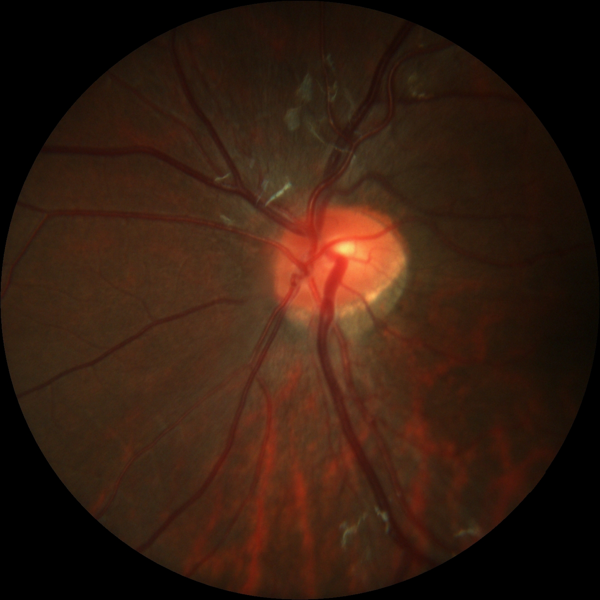

In [4]:
from PIL import Image
import numpy as np
# 读取图片
png_img = Image.open('PaddleSeg/data/常规赛：PALM病理性近视病灶检测与分割/Train/fundus_image/H0003.jpg')
png_img = png_img.resize((600, 600))
png_img  # 展示真实图片

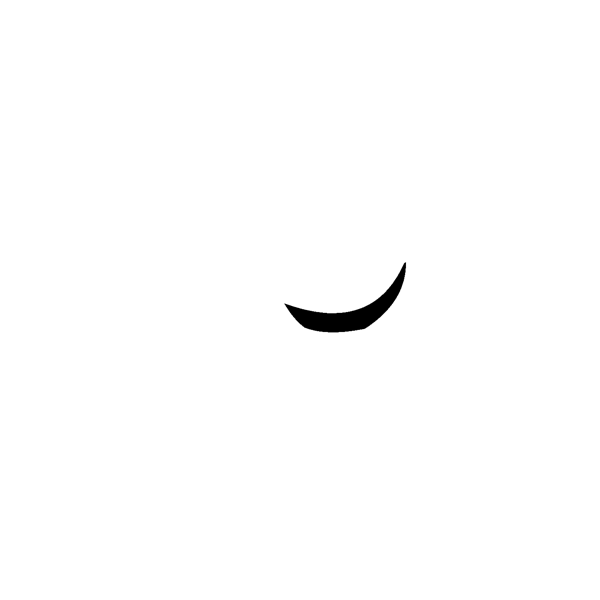

In [5]:
bmp_img = Image.open('PaddleSeg/data/常规赛：PALM病理性近视病灶检测与分割/Train/Lesion_Masks/Atrophy/H0003.bmp')
bmp_img = bmp_img.resize((600, 600))
bmp_img   # 展示萎缩标注图片

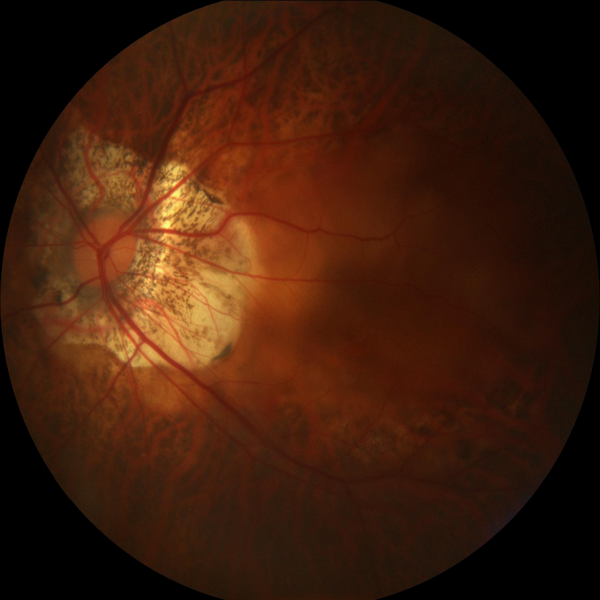

In [6]:
png_img = Image.open('PaddleSeg/data/常规赛：PALM病理性近视病灶检测与分割/Train/fundus_image/P0053.jpg')
png_img = png_img.resize((600, 600))
png_img   # 展示萎缩标注图片

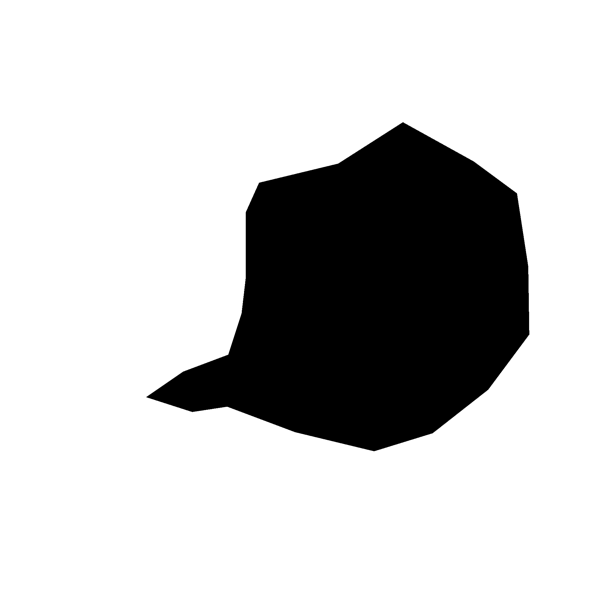

In [7]:
bmp_img = Image.open('PaddleSeg/data/常规赛：PALM病理性近视病灶检测与分割/Train/Lesion_Masks/Detachment/P0053.bmp')
bmp_img = bmp_img.resize((600, 600))
bmp_img   # 展示脱落标注图片

# 三、划分数据集与数据预处置

当前划分比例为0.8——可在utils文件夹下的dataset_splited.py修改**train_percent**为其它值

数据预处置-可在utils文件夹下的dataset_pretrans.py中查看相关代码--实现将255转化为1，原问题变二分类问题

> 注意：当前数据处理中，存在对数据进行扩充，因此当前程序运行一次之后会使得原分类数据数目增加——(扩增不宜过大，否则划分数据进行训练和验证时会出现偏差问题)

> 仅可运行一次，多次运行会导致填充数量过多，这是源码中扩充机制决定的(直接扩充到源文件夹中，所以下一次划分的时候就会默认把源文件中所有的文件读取)

> 感兴趣可前往查看dataset_splited.py的数据扩充区

In [8]:
# 保证路径为初始路径
%cd /home/aistudio

# 划分数据
!python utils/dataset_splited.py

# 转换标签--预处置
!python utils/dataset_pretrans.py

/home/aistudio
————开始数据清洗划分————
BMP标注数据: Detachment: 18张 	 Atrophy: 582张
———— 开始构建数据目录 ————
The Dir Has Create: PaddleSeg/data/Detachment/Image 
The Dir Has Create: PaddleSeg/data/Detachment/Label 
The Dir Has Create: PaddleSeg/data/Detachment/Test 
The Dir Has Create: PaddleSeg/data/Atrophy/Image 
The Dir Has Create: PaddleSeg/data/Atrophy/Label 
The Dir Has Create: PaddleSeg/data/Atrophy/Test 
————开始针对类别Detachment进行数据扩充(2张)————
Processing Train-Detachment Split: 100%|██████| 800/800 [00:17<00:00, 46.79it/s]
实际扩充: 213 张, 现类别 Detachment 拥有数据: 21 份
————开始针对类别Atrophy进行数据扩充(24张)————
Processing Train-Atrophy Split: 100%|█████████| 800/800 [00:16<00:00, 47.36it/s]
实际扩充: 210 张, 现类别 Atrophy 拥有数据: 614 份
——开始划分Detachment——
The Split Params: train_percent=0.80
Processing Test-Detachment Split: 100%|██████| 400/400 [00:00<00:00, 579.90it/s]
——开始划分Atrophy——
The Split Params: train_percent=0.80
Processing Test-Atrophy Split: 100%|█████████| 400/400 [00:00<00:00, 596.53it/s]
PaddleSeg/data
├── Atrop

移除原数据，减小项目空间，减少下一次进入和退出保存时花的时间

In [9]:
# 移除’常规赛：PALM病理性近视病灶检测与分割‘文件夹
!rm -rf PaddleSeg/data/常规赛：PALM病理性近视病灶检测与分割
!rm -rf PaddleSeg/data/__MACOSX 

# 四、选择比赛模型

基线模型为:  配置略微修改的`PaddleSeg/configs/emanet/emanet_resnet50_os8_voc12aug_512x512_40k.yml`

具体配置在
	
	-- example/emanet_resnet50_os8_voc12aug_512x512_40k_Deta.yml
    * 用于分割脱落情况
    
	-- example/emanet_resnet50_os8_voc12aug_512x512_40k_Atro.yml
    * 用于分割萎缩情况

详细数据集配置在

	-- example/pascal_voc2012_Deta.yml
    * 用于设置脱落情况数据

	-- example/pascal_voc2012_Atro.yml
    * 用于设置萎缩情况数据
    

> 针对不同分割任务配置不同的分割模型，以适配不同的任务驱动

## 1.配置_base_中对应的数据集与模型

> 具体配置信息，可以在`examples`文件夹下查看相应`yml`文件，有相应的注释。

**简要说明`example/pascal_voc2012_Deta.yml`中的配置要点**，以方便大家修改其他的数据集yml适配模型训练

```yml
# 该文件需要自行移动到PaddleSeg/configs/_base_下, 并修改模型文件中的_base_路径(建议)
# 或者根据该文件中的train_dataset与val_dataset，对_base_下相应的yml进行修改

# 批大小   -- 可通过训练时动态调整
batch_size: 4
# 迭代次数 -- 可通过训练时动态调整 
iters: 40000

# 自定义数据集加载的方式
train_dataset:
  # 自定义数据集加载方式：Dataset
  type: Dataset
  # 数据集目录--当前项目中类别Detachment的数据都放在了这里：data/Detachment
  # 不同类别的训练，可以换成不同的数据根目录
  # Atrophy类--对应data/Atrophy
  dataset_root: data/Detachment
  # 该目录下划分数据产生的txt：data/Detachment/train_list.txt
  train_path: data/Detachment/train_list.txt
  # 类别--当前已转换为2分类问题
  num_classes: 2
  # 预处理
  transforms:
    - type: ResizeStepScaling
      min_scale_factor: 0.5
      max_scale_factor: 2.0
      scale_step_size: 0.25
    # 考虑到当前数据集正确划分区域较小，RandomPaddingCrop是否有必要不清楚，可以自行尝试
    # 下边有提供Resize处理缩放--选1缩放标准即可
    # - type: RandomPaddingCrop
    #   crop_size: [600, 600]
    - type: Resize
      target_size: [800, 800]
    - type: RandomHorizontalFlip
    - type: Normalize
  # 数据集加载方式--注意要一一对应
  mode: train

val_dataset:
  type: Dataset
  dataset_root: data/Detachment
  # 注意验证数据集的path和训练数据集path的区别
  val_path: data/Detachment/val_list.txt
  num_classes: 2
  transforms:
    # 修改padding为Resize，padding仅作填充，对于大图片无法缩放
    - type: Resize
      target_size: [800, 800]
    - type: Normalize
  # mode务必对应，否则无法索引正确的路径
  mode: val

# 原数据集
# train_dataset:
#   type: PascalVOC
#   dataset_root: data/VOCdevkit/
#   transforms:
#     - type: ResizeStepScaling
#       min_scale_factor: 0.5
#       max_scale_factor: 2.0
#       scale_step_size: 0.25
#     - type: RandomPaddingCrop
#       crop_size: [512, 512]
#     - type: RandomHorizontalFlip
#     - type: RandomDistort
#       brightness_range: 0.4
#       contrast_range: 0.4
#       saturation_range: 0.4
#     - type: Normalize
#   mode: train

# val_dataset:
#   type: PascalVOC
#   dataset_root: data/VOCdevkit/
#   transforms:
#     - type: Padding
#       target_size: [512, 512]
#     - type: Normalize
#   mode: val

# 以下参数可以在模型yml中被配置
# 优化器选择
optimizer:
  type: sgd
  momentum: 0.9
  # 正则化
  weight_decay: 4.0e-5

# 学习率--多项式
learning_rate:
  value: 0.01
  decay:
    type: poly
    power: 0.9
    end_lr: 0.0

# 损失配置项--可参考其它模型yml文件
loss:
  types:
    - type: CrossEntropyLoss
  coef: [1]
```

**至于模型配置，以当前使用Emanet为例说明**:

> 大家在使用模型yml时，为了保证数可读取，可以使用提供的两个数据集yml，分别操作加载不同的数据

```yml
# _base_: '../_base_/pascal_voc12aug.yml'

# 用调整后的pascal_voc2012.yml替换原始的_base_数据集配置文件
_base_: '../_base_/pascal_voc2012_Deta.yml'

model:
  # 模型名称
  type: EMANet
  backbone:
  	  # 骨干网络选择--可参考其它模型yml
    type: ResNet50_vd
    output_stride: 8
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/resnet50_vd_ssld_v2.tar.gz
  ema_channels: 512
  gc_channels: 256
  num_bases: 64
  stage_num: 3
  momentum: 0.2
  concat_input: True
  # 多损失
  enable_auxiliary_loss: True
  align_corners: True
  
# 最后会按照模型yml中的优化器进行优化
optimizer:
  type: sgd
  momentum: 0.9
  # 正则化参数
  weight_decay: 0.0005

# 最后会按照模型yml中的损失进行计算
loss:
  types:
    - type: CrossEntropyLoss
    - type: DiceLoss
  coef: [4.,2.]
```

> 将预置的基线配置yml移动到相应的文件夹下

* _base_: 数据加载yml存放

* emanet: emanet模型yml存放

In [10]:
%cd /home/aistudio/
!cp -u example/pascal_voc2012_Atro.yml PaddleSeg/configs/_base_/
!cp -u example/pascal_voc2012_Deta.yml PaddleSeg/configs/_base_/
!cp -u example/emanet_resnet50_os8_voc12aug_512x512_40k_Deta.yml PaddleSeg/configs/emanet/
!cp -u example/emanet_resnet50_os8_voc12aug_512x512_40k_Atro.yml PaddleSeg/configs/emanet/

/home/aistudio



## 2.启动训练

### 0.下载依赖项

在平台上可以不用执行，环境支持；线下可能需要下载。

In [11]:
# 下载依赖项，保证PaddleSeg正常运行
%cd PaddleSeg
%pwd
!pip install -r requirements.txt

/home/aistudio/PaddleSeg
Looking in indexes: https://mirror.baidu.com/pypi/simple/


### 1. 载入模型开始训练

> 更换自定义的模型文件时，只需要修改对应的模型yml、数据集yml(_base_中的yml)、以及替换下方的yml即可进行训练了

> 不要更改输出目录，否则后边的代码也需要修改，包括预测、后处理中的所有路径

In [16]:
%cd PaddleSeg
%pwd
# 训练分割Detachment的模型，并保存到/output/Detachment
!python train.py --c configs/emanet/emanet_resnet50_os8_voc12aug_512x512_40k_Deta.yml \
--use_vdl \
--save_interval 200 \
--do_eval \
--seed 2021 \
--iters 2000 \
--learning_rate 0.005 \
--save_dir ./output/Detachment

# # 训练分割Atrophy的模型，并保存到/output/Atrophy
# !python train.py --c configs/emanet/emanet_resnet50_os8_voc12aug_512x512_40k_Atro.yml \
# --use_vdl \
# --save_interval 200 \
# --do_eval \
# --seed 2021 \
# --iters 3000 \
# --learning_rate 0.01 \
# --save_dir ./output/Atrophy

/home/aistudio/PaddleSeg
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
2021-08-14 12:20:39 [INFO]	
------------Environment Information-------------
platform: Linux-4.4.0-150-generic-x86_64-with-debian-stretch-sid
Python: 3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
Paddle compiled with cuda: True
NVCC: Cuda compilation tools, release 10.1, V10.1.243
cudnn: 7.6
GPUs used: 1
CUDA_VISIBLE_DEVICE

## 3.开始预测

这可以直接使用emanet进行预测，不用修改数据集yml，也不用修改相应的模型yml，注意训练权重对应即可！

> 预测结果按类别分别放在`./output/result/Detachment` 和 `./output/result/Atrophy` 下

> 如果使用不同的模型对不同的分割类进行讨论，注意模型yml即可

> 提交结果为两种单独预测的结果

**默认使用Iou评估最好的模型训练参数--best_model**

In [17]:
%cd PaddleSeg/
# 预测Detachment
!python predict.py --config configs/emanet/emanet_resnet50_os8_voc12aug_512x512_40k_Deta.yml \
--model_path output/Detachment/best_model/model.pdparams \
--image_path data/Detachment/Test \
--save_dir ./output/result/Detachment

# 预测Atrophy
!python predict.py --config configs/emanet/emanet_resnet50_os8_voc12aug_512x512_40k_Atro.yml  \
--model_path output/Atrophy/best_model/model.pdparams \
--image_path data/Atrophy/Test \
--save_dir ./output/result/Atrophy

[Errno 2] No such file or directory: 'PaddleSeg/'
/home/aistudio/PaddleSeg
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
2021-08-14 13:19:49 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 40000
learning_rate:
  decay:
    end_lr: 0.0
    power: 0.9
    type: poly
  value: 0.01
loss:
  coef:
  - 1.0
  - 0.5
  types:
  - type: CrossEntropyLoss
  - type: DiceLoss
model:


# 五、预测结果后处理

* 将类别值1换为255，进行赛题结果提交

In [18]:
%cd /home/aistudio/
!python utils/post_process.py

/home/aistudio
————开始提交结果前的后处理————
————开始Detachment预测结果后处理————
100%|█████████████████████████████████████████| 400/400 [00:24<00:00, 16.34it/s]
————开始Atrophy预测结果后处理————
100%|█████████████████████████████████████████| 400/400 [00:23<00:00, 17.04it/s]
后处理完成(cost: 48.37050914764404 s)！


# 六、提交比赛结果

In [19]:
# 复制文件到最顶层目录
%cd /home/aistudio
!cp -r PaddleSeg/output/result/ Lesion_Segmentation

# 过程移动文件--保证不包含生成的子目录
%cd Lesion_Segmentation
!cp -r Detachment/pseudo_color_prediction/. Detachment
!cp -r Atrophy/pseudo_color_prediction/. Atrophy

# 获取指定的提交目录格式
!rm -rf Detachment/added_prediction
!rm -rf Detachment/pseudo_color_prediction

!rm -rf Atrophy/added_prediction
!rm -rf Atrophy/pseudo_color_prediction

# 压缩文件
%cd /home/aistudio
!zip -r Lesion_Segmentation.zip Lesion_Segmentation
# 删除复制的文件
!rm -rf Lesion_Segmentation

/home/aistudio
/home/aistudio/Lesion_Segmentation
/home/aistudio
  adding: Lesion_Segmentation/ (stored 0%)
  adding: Lesion_Segmentation/Atrophy/ (stored 0%)
  adding: Lesion_Segmentation/Atrophy/T0221.png (deflated 51%)
  adding: Lesion_Segmentation/Atrophy/T0022.png (deflated 91%)
  adding: Lesion_Segmentation/Atrophy/T0371.png (deflated 57%)
  adding: Lesion_Segmentation/Atrophy/T0143.png (deflated 60%)
  adding: Lesion_Segmentation/Atrophy/T0271.png (deflated 58%)
  adding: Lesion_Segmentation/Atrophy/T0382.png (deflated 87%)
  adding: Lesion_Segmentation/Atrophy/T0205.png (deflated 85%)
  adding: Lesion_Segmentation/Atrophy/T0105.png (deflated 82%)
  adding: Lesion_Segmentation/Atrophy/T0082.png (deflated 70%)
  adding: Lesion_Segmentation/Atrophy/T0181.png (deflated 78%)
  adding: Lesion_Segmentation/Atrophy/T0174.png (deflated 63%)
  adding: Lesion_Segmentation/Atrophy/T0017.png (deflated 95%)
  adding: Lesion_Segmentation/Atrophy/T0009.png (deflated 62%)
  adding: Lesion_Segme

In [ ]:
# # 删除zip的文件--丢失提交结果，需重新后处理生成
# !rm -rf Lesion_Segmentation.zip
# # 删除预测结果--丢失预测结果，需重新预测
# !rm -rf PaddleSeg/output/result
# # 删除output文件夹--丢失模型参数，需重新训练
# !rm -rf PaddleSeg/output
# # 删除data文件夹--数据将丢失，需要重新解压，划分，预处置
# !rm -rf PaddleSeg/data

# 七、其它建议

> 对于少类别预测较差，可以通过更换模型、数据增广等方式获取更优的预测

* 1. 模型建议：注意力模型(EMANet等)或者调整unet模型
* 2. 损失建议：多损失结构，不同的coef，针对赛题的特殊损失等(Dice等)
* 3. 模型魔改建议：尝试对Unet添加注意力模块，修改参数，或者调整不同的backbone与indices组合
* 4. 优化器与学习率策略的调整

最后，祝大家Paddle越用越顺手，比赛越打越顺利——取得理想的成绩！

> 有问题欢迎评论区讨论

> 姓名：蔡敬辉

> 学历：大三（在读）

> 爱好：喜欢参加一些大大小小的比赛，不限于计算机视觉——有共同爱好的小伙伴可以关注一下哦~后期会持续更新一些自制的竞赛baseline和一些竞赛经验分享

> 主要方向：目标检测、图像分割与图像识别--在学习NLP, 正在捣鼓FPGA

> 联系方式：qq:3020889729 微信:cjh3020889729

> 学校：西南科技大学